# EDA and DataViz 

In [1]:
# Import all libraries and modules
import pandas as pd
import numpy as np

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from matplotlib import rc

## Transformation
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

import math 

import os

# Import utility functions 
import utilityfunctions as uf

print('Libraries imported successfully')


Libraries imported successfully


In [2]:
# set the style for the notebook, in this case colorblind, alternative would be grayscale
uf.set_custom_palette("colorblind")
figures_folder = '../reports/figures' 

In [3]:
# Reading MIT-BIH Arrhythmia Dataset as an example
df = pd.read_csv('MIT-BIH Arrhythmia Database.csv') 
print(df.shape)
df.head(10)

(100689, 34)


,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
5,101,N,344,324.0,-0.083040,-0.293023,0.931546,-0.433485,-0.088745,22,...,-0.036339,8,10,19,1,-0.036339,-0.034673,-0.026985,-0.022147,-0.013531
6,101,N,324,313.0,-0.067520,-0.286934,1.050545,-0.482886,-0.074666,23,...,-0.032788,27,10,45,8,-0.032788,-0.017467,0.013925,0.035176,0.016576
7,101,N,313,313.0,-0.085844,-0.341904,1.154904,-0.439149,-0.094663,22,...,-0.008229,8,2,21,11,-0.008229,-0.011703,-0.024895,-0.034285,-0.054572
8,101,N,313,310.0,-0.061510,-0.257011,1.107787,-0.385508,-0.065044,25,...,-0.029834,21,31,61,9,-0.029834,-0.020603,0.004411,0.025997,0.015942
9,101,N,310,329.0,-0.063513,-0.319736,1.087343,-0.425738,-0.074461,22,...,0.018915,15,2,26,9,0.018915,0.010747,0.000927,-0.018538,-0.060157


In [4]:
# DF Overview 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100689 entries, 0 to 100688
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          100689 non-null  int64  
 1   type            100689 non-null  object 
 2   0_pre-RR        100689 non-null  int64  
 3   0_post-RR       100689 non-null  float64
 4   0_pPeak         100689 non-null  float64
 5   0_tPeak         100689 non-null  float64
 6   0_rPeak         100689 non-null  float64
 7   0_sPeak         100689 non-null  float64
 8   0_qPeak         100689 non-null  float64
 9   0_qrs_interval  100689 non-null  int64  
 10  0_pq_interval   100689 non-null  int64  
 11  0_qt_interval   100689 non-null  int64  
 12  0_st_interval   100689 non-null  int64  
 13  0_qrs_morph0    100689 non-null  float64
 14  0_qrs_morph1    100689 non-null  float64
 15  0_qrs_morph2    100689 non-null  float64
 16  0_qrs_morph3    100689 non-null  float64
 17  0_qrs_morp

In [5]:
df['record'].unique()

array([101, 106, 108, 109, 112, 114, 115, 116, 118, 119, 122, 124, 201,
       203, 205, 207, 208, 209, 215, 220, 223, 230, 100, 103, 105, 111,
       113, 117, 121, 123, 200, 202, 210, 212, 213, 214, 219, 221, 222,
       228, 231, 232, 233, 234])

In [6]:
df = df.drop('record', axis=1)

In [7]:
# Check for null values
df.isnull().sum()

type              0
0_pre-RR          0
0_post-RR         0
0_pPeak           0
0_tPeak           0
0_rPeak           0
0_sPeak           0
0_qPeak           0
0_qrs_interval    0
0_pq_interval     0
0_qt_interval     0
0_st_interval     0
0_qrs_morph0      0
0_qrs_morph1      0
0_qrs_morph2      0
0_qrs_morph3      0
0_qrs_morph4      0
1_pre-RR          0
1_post-RR         0
1_pPeak           0
1_tPeak           0
1_rPeak           0
1_sPeak           0
1_qPeak           0
1_qrs_interval    0
1_pq_interval     0
1_qt_interval     0
1_st_interval     0
1_qrs_morph0      0
1_qrs_morph1      0
1_qrs_morph2      0
1_qrs_morph3      0
1_qrs_morph4      0
dtype: int64

In [8]:
# Get numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Determine the number of rows and columns for subplots
num_plots = len(numeric_columns)
num_rows = math.ceil(num_plots / 4)
num_cols = min(num_plots, 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

# Flatten axes if there's only one row or column
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)

# Plot histograms
for i, col in enumerate(numeric_columns):
    row_idx = i // 4
    col_idx = i % 4
    ax = axes[row_idx][col_idx]
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove empty subplots if there are any
for i in range(num_plots, num_rows * num_cols):
    row_idx = i // 4
    col_idx = i % 4
    fig.delaxes(axes[row_idx][col_idx])

# Adjust layout
plt.tight_layout()

# Save the plot into the figures folder
filename = 'mit_numeric_columns_histograms.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()

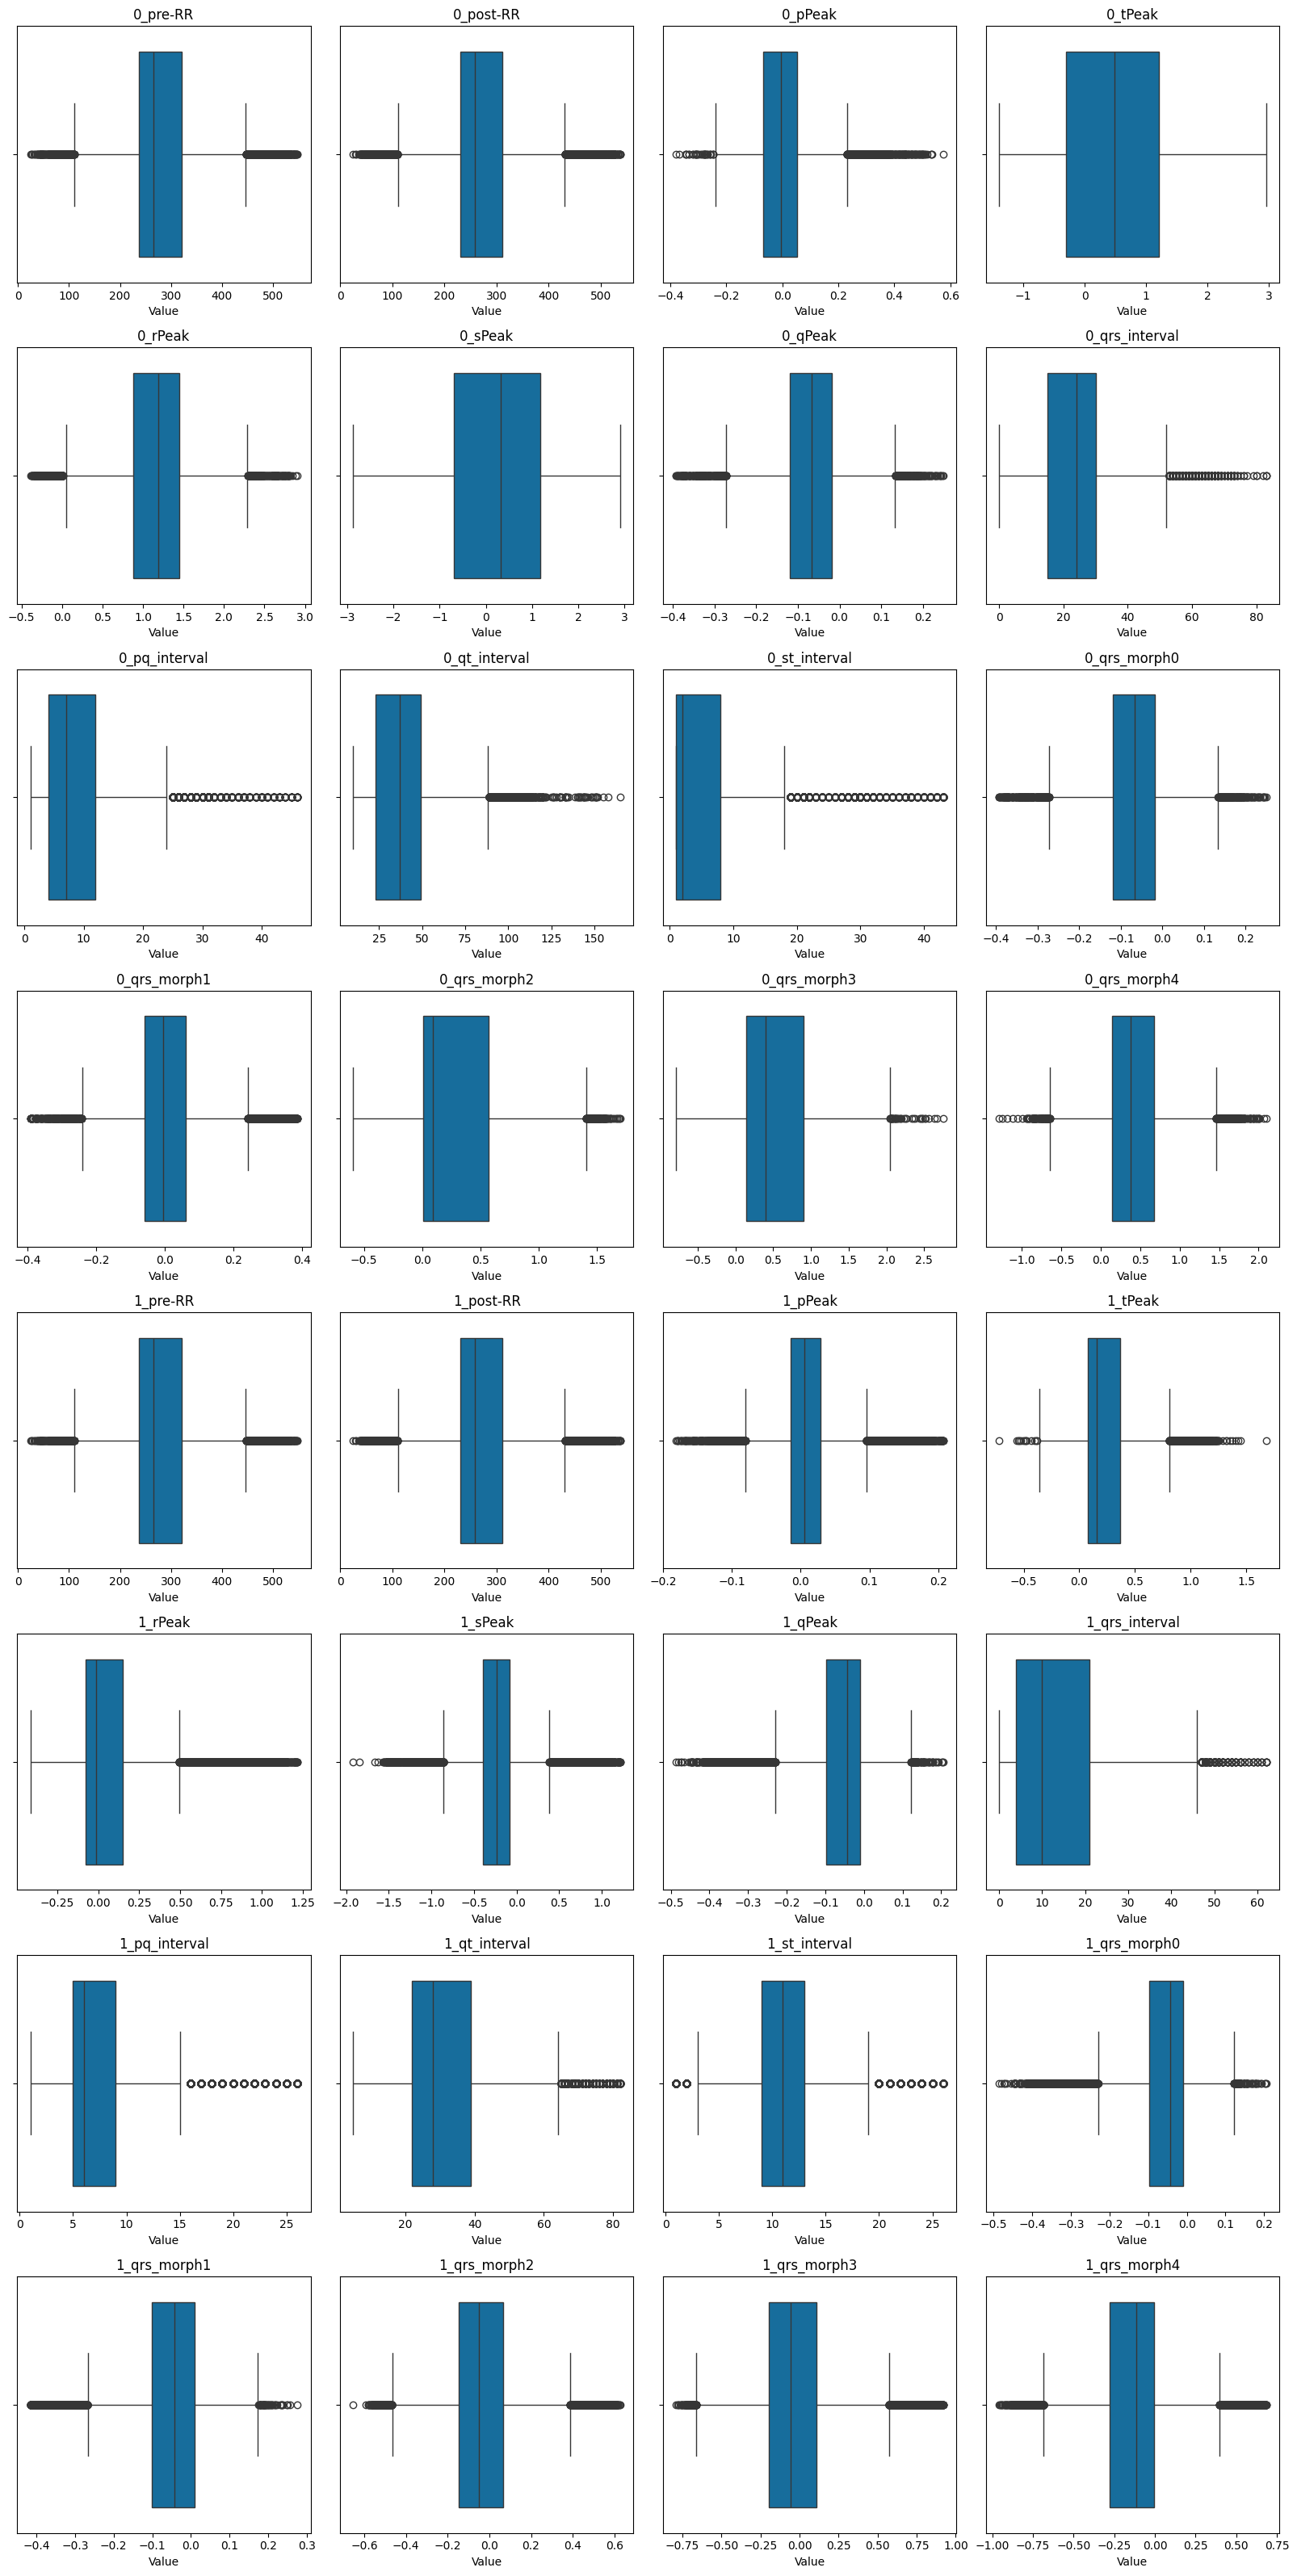

In [ ]:
# Determine the number of rows and columns for subplots
num_plots = len(numeric_columns)
num_rows = math.ceil(num_plots / 4)
num_cols = min(num_plots, 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

# Flatten axes if there's only one row or column
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)

# Plot boxplots
for i, col in enumerate(numeric_columns):
    row_idx = i // 4
    col_idx = i % 4
    ax = axes[row_idx][col_idx]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')

# Remove empty subplots if there are any
for i in range(num_plots, num_rows * num_cols):
    row_idx = i // 4
    col_idx = i % 4
    fig.delaxes(axes[row_idx][col_idx])

# Adjust layout
plt.tight_layout()

# Save the plot into the figures folder with 'mit_' prefix
filename = 'mit_numeric_columns_boxplots.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()

In [ ]:
X = df.drop('type', axis=1)  # Features
y = df['type']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply IQR method to each numeric column
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define multiplier for widening the IQR threshold
    k = 2.5

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

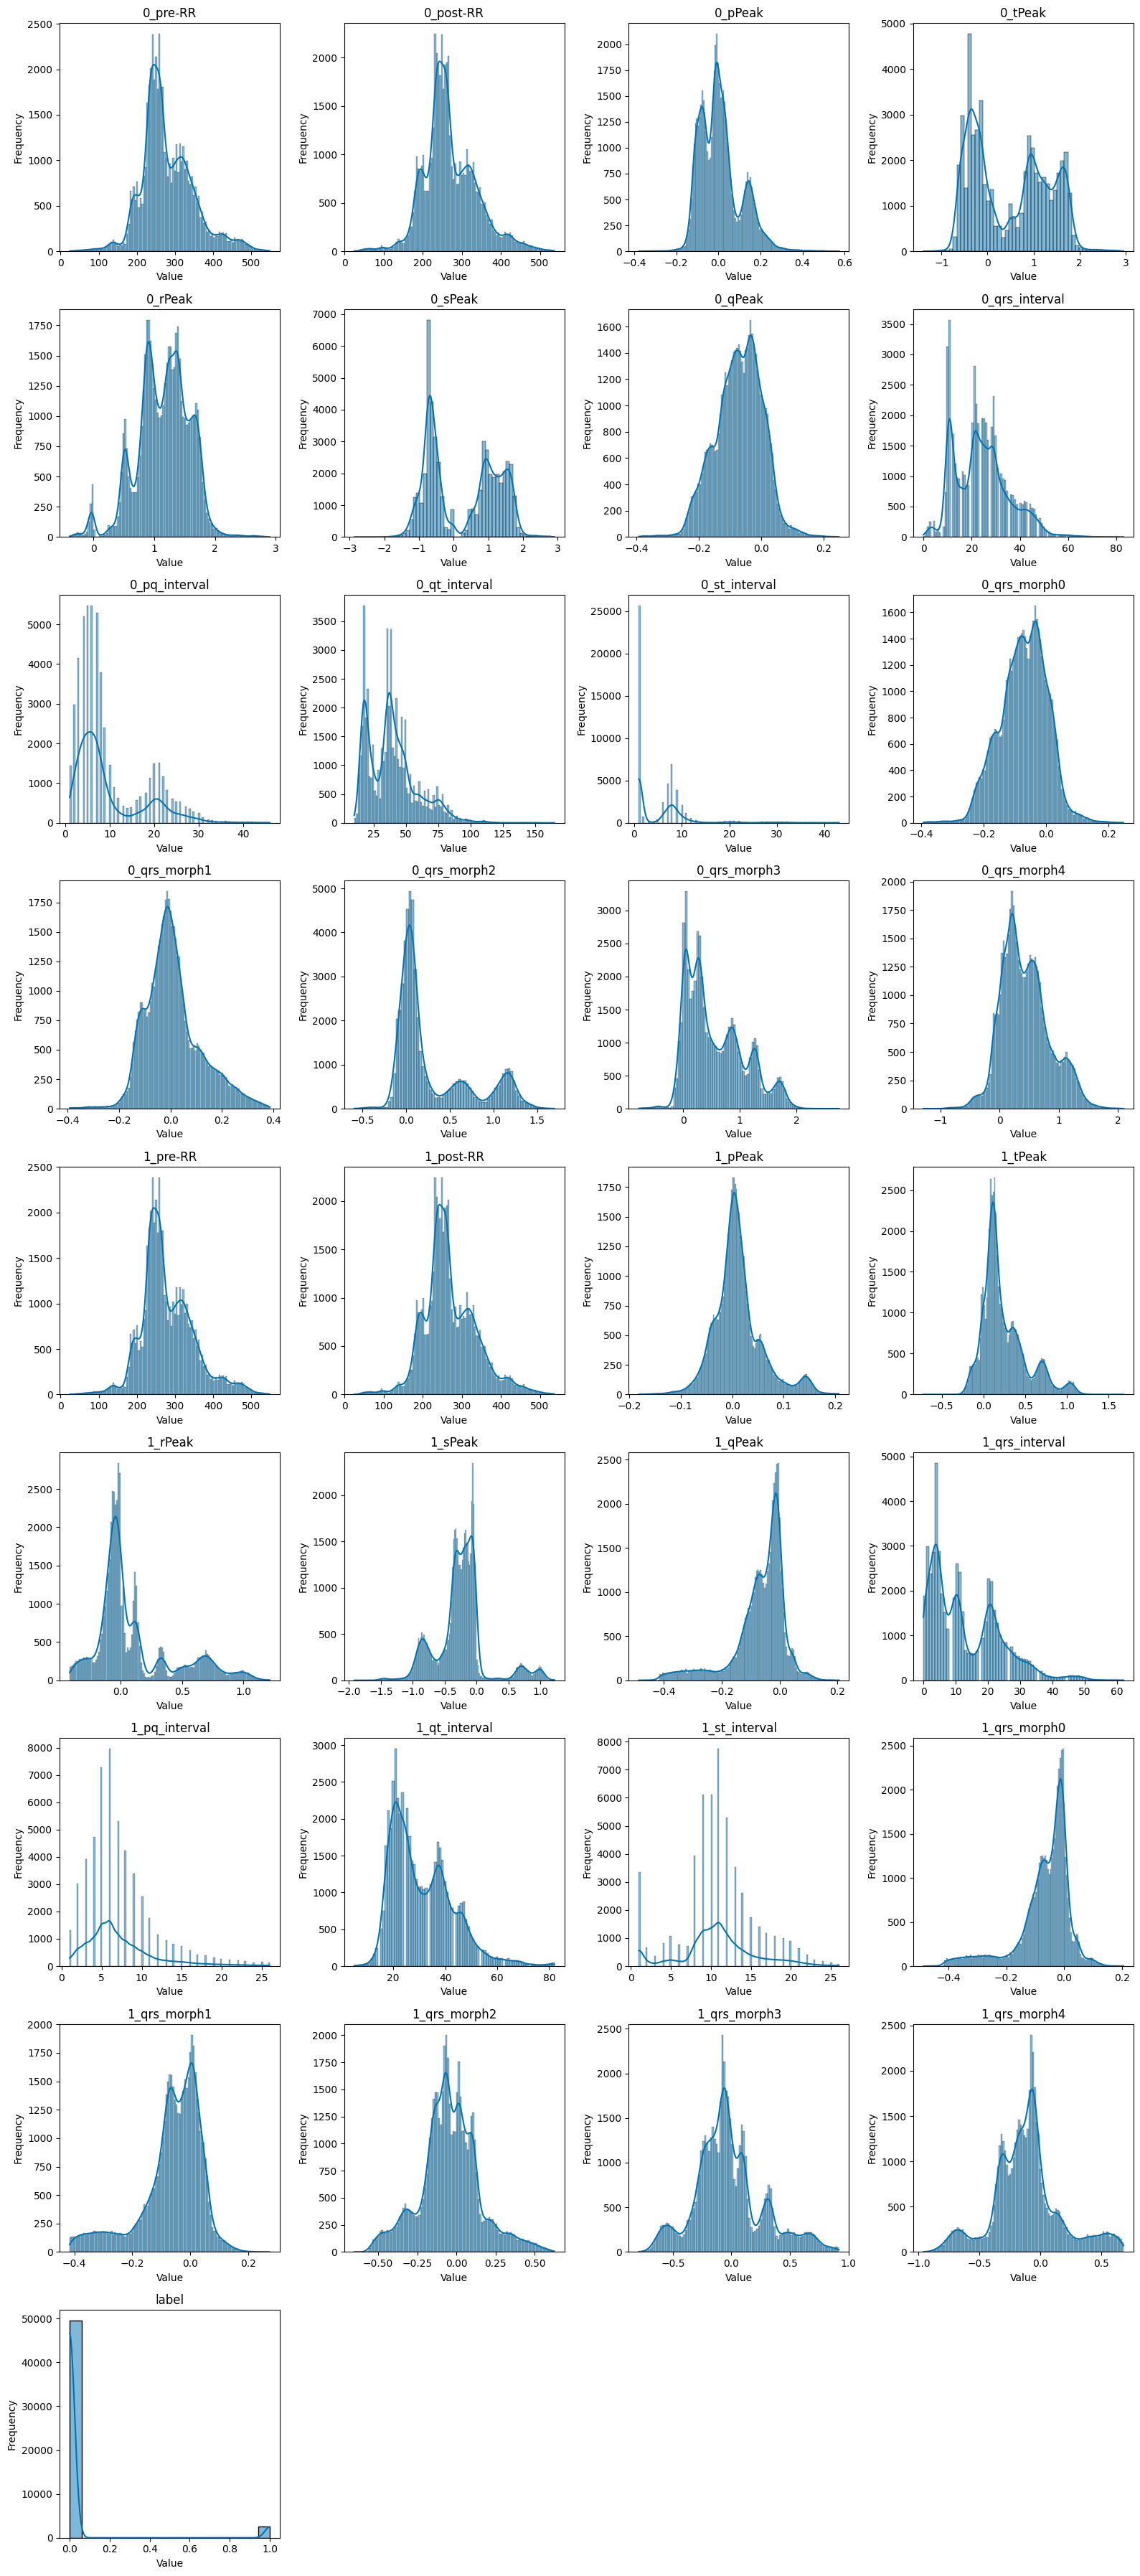

In [ ]:
# Get numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Determine the number of rows and columns for subplots
num_plots = len(numeric_columns)
num_rows = math.ceil(num_plots / 4)
num_cols = min(num_plots, 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

# Flatten axes if there's only one row or column
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)

# Plot histograms
for i, col in enumerate(numeric_columns):
    row_idx = i // 4
    col_idx = i % 4
    ax = axes[row_idx][col_idx]
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove empty subplots if there are any
for i in range(num_plots, num_rows * num_cols):
    row_idx = i // 4
    col_idx = i % 4
    fig.delaxes(axes[row_idx][col_idx])

# Adjust layout
plt.tight_layout()

# Save the plot into the figures folder with 'mit_' prefix
filename = 'mit_numeric_columns_histograms.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()

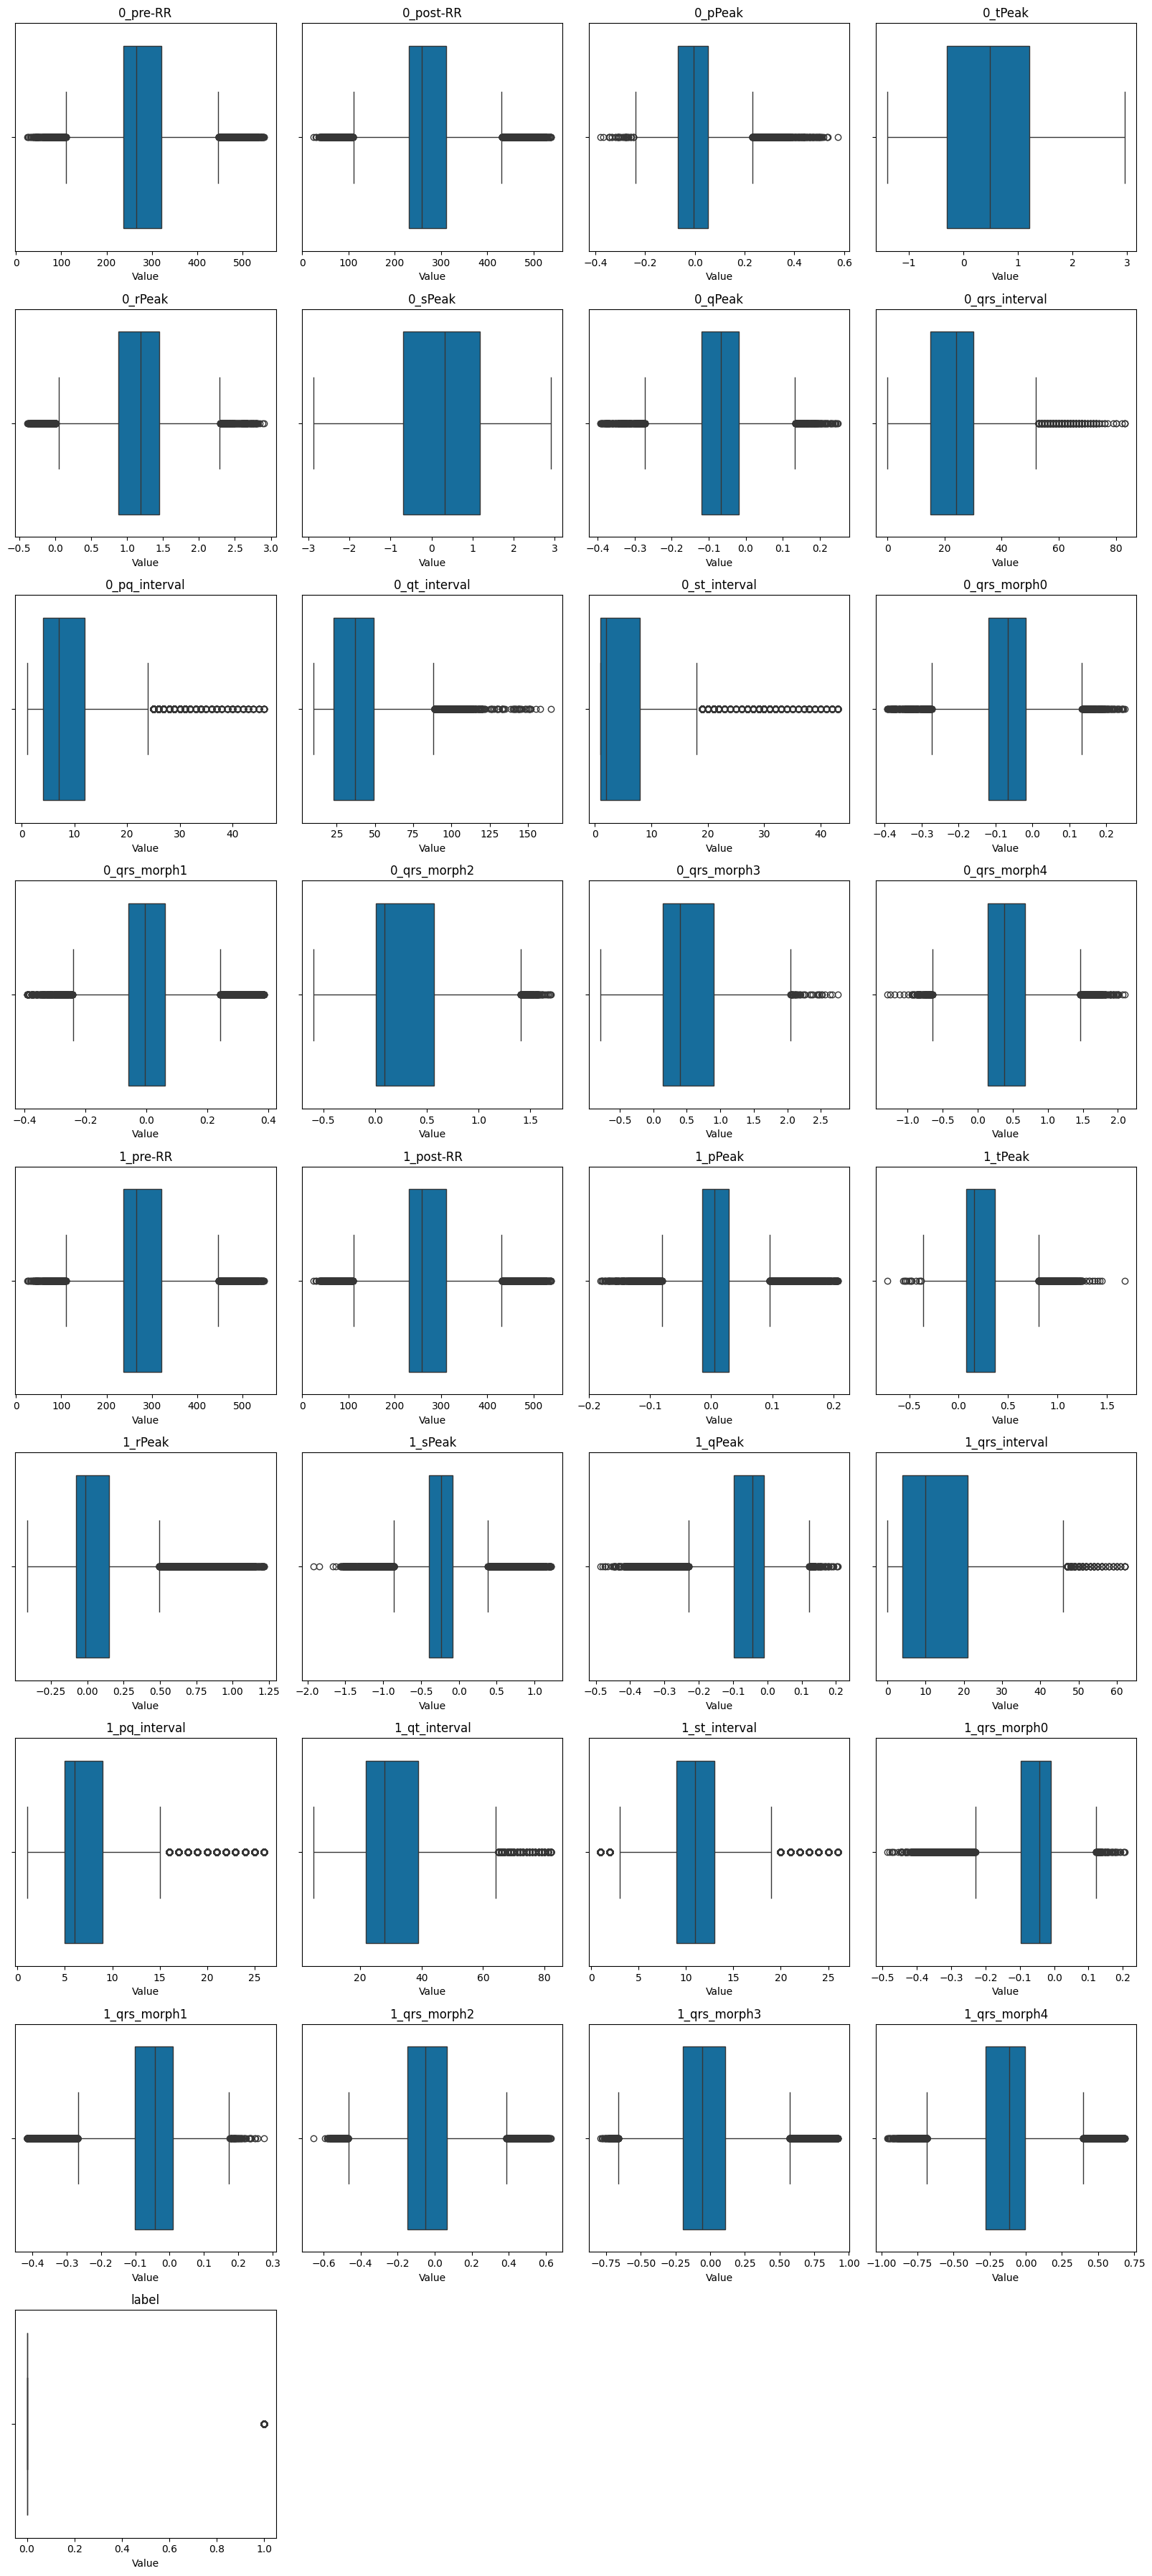

In [ ]:
# Determine the number of rows and columns for subplots
num_plots = len(numeric_columns)
num_rows = math.ceil(num_plots / 4)
num_cols = min(num_plots, 4)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))

# Flatten axes if there's only one row or column
if num_rows == 1:
    axes = axes.reshape(1, -1)
if num_cols == 1:
    axes = axes.reshape(-1, 1)

# Plot boxplots
for i, col in enumerate(numeric_columns):
    row_idx = i // 4
    col_idx = i % 4
    ax = axes[row_idx][col_idx]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')

# Remove empty subplots if there are any
for i in range(num_plots, num_rows * num_cols):
    row_idx = i // 4
    col_idx = i % 4
    fig.delaxes(axes[row_idx][col_idx])

# Adjust layout
plt.tight_layout()

# Save the plot into the figures folder with 'mit_' prefix
filename = 'mit_numeric_columns_boxplots.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()

In [ ]:
# Check for duplicates
df.duplicated().any()

False

In [ ]:
# Summary Statistics
df.describe()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000,...,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000
mean,280.118325,269.886793,0.008320,0.487392,1.151412,0.257741,-0.071328,24.257773,9.642994,39.503623,...,-0.067835,13.055741,7.223002,31.126107,10.847364,-0.067835,-0.064207,-0.042250,-0.019143,-0.113311
std,68.813845,67.297877,0.096624,0.817729,0.425322,0.993917,0.075127,11.208046,7.705183,19.088516,...,0.092097,10.671373,4.351731,11.871099,4.693487,0.092097,0.107841,0.192050,0.294180,0.281848
min,24.000000,25.000000,-0.378501,-1.392988,-0.392283,-2.866841,-0.392538,0.000000,1.000000,10.000000,...,-0.486126,0.000000,1.000000,5.000000,1.000000,-0.486126,-0.415932,-0.652653,-0.790624,-0.957383
25%,237.000000,231.000000,-0.066857,-0.300070,0.882732,-0.685334,-0.120096,15.000000,4.000000,23.000000,...,-0.098013,4.000000,5.000000,22.000000,9.000000,-0.098013,-0.101816,-0.146234,-0.199564,-0.277748
50%,265.000000,259.000000,-0.005416,0.489174,1.188286,0.316882,-0.067201,24.000000,7.000000,37.000000,...,-0.043917,10.000000,6.000000,28.000000,11.000000,-0.043917,-0.043266,-0.050350,-0.056581,-0.116199
75%,321.000000,311.000000,0.052503,1.207590,1.445078,1.181018,-0.018719,30.000000,12.000000,49.000000,...,-0.009897,21.000000,9.000000,39.000000,13.000000,-0.009897,0.008660,0.067322,0.109298,-0.007185
max,548.000000,537.000000,0.573539,2.953971,2.904485,2.904485,0.248703,83.000000,46.000000,165.000000,...,0.204772,62.000000,26.000000,82.000000,26.000000,0.204772,0.275410,0.627194,0.918576,0.682538


In [ ]:
# Countplot of types
class_names = {'N': 'Normal', 'SVEB': 'Supraventricular ectopic beat', 
               'VEB': 'Ventricular ectopic beat', 'F': 'Fusion beat', 'Q': 'Unknown beat'}

df['type'] = df['type'].map(class_names)

plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x="type")
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Type', fontsize=14)
plt.title('Distribution of Each Type', fontsize=16)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

plt.tight_layout()

# Save the plot into the figures folder with 'mit_' prefix
filename = 'mit_countplot_types.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()

KeyError: 'type'

# Create binary target variable from type column

In [ ]:
df['type'].value_counts()# Define a lambda function to map the values
class_mapping_lambda = lambda x: 0 if x == 'Normal' else 1

# Apply the lambda function to create the new 'class' column
df['label'] = df['type'].apply(class_mapping_lambda)

# Print the value counts of the new 'class' column
print(df['label'].value_counts())

label
0    49544
1     2626
Name: count, dtype: int64


In [ ]:
# Drop 'type' and 'record' columns
df.drop(['type'], axis=1, inplace=True)
df.head()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,label
0,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,18,66,...,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436,0
2,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,3,32,...,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368,0
3,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,4,33,...,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555,0
4,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,4,16,...,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155,0
5,344,324.0,-0.083040,-0.293023,0.931546,-0.433485,-0.088745,22,3,33,...,8,10,19,1,-0.036339,-0.034673,-0.026985,-0.022147,-0.013531,0


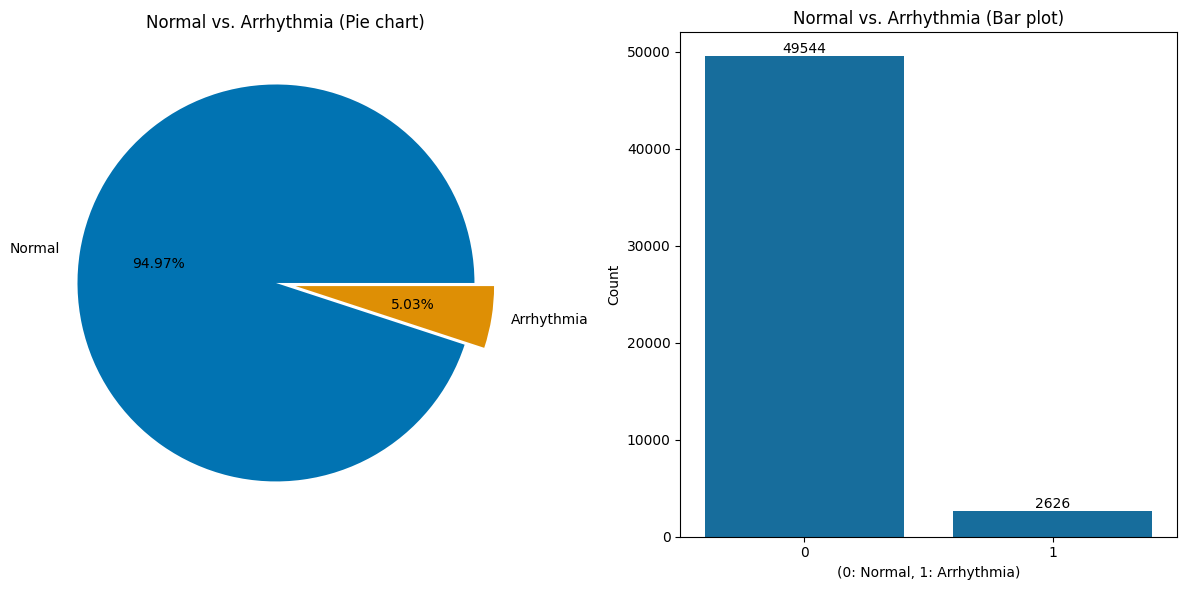

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot pie chart
label_counts = df['label'].value_counts(normalize=True)
axs[0].pie(label_counts, labels=['Normal', 'Arrhythmia'], explode=[0.05, 0.05], autopct="%0.2f%%")
axs[0].set_title('Normal vs. Arrhythmia (Pie chart)')

# Plot countplot
ax = sns.countplot(data=df, x='label', ax=axs[1])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            '{:.0f}'.format(p.get_height()), 
            ha='center', va='bottom')
ax.set_xlabel('(0: Normal, 1: Arrhythmia)')
ax.set_ylabel('Count')
ax.set_title('Normal vs. Arrhythmia (Bar plot)')

# Adjust layout
plt.tight_layout() 

# Save the plot into the figures folder with a proper filename prefix
filename = 'mit_uci_normal_vs_diagnosis_plots.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()

# PCA Analysis

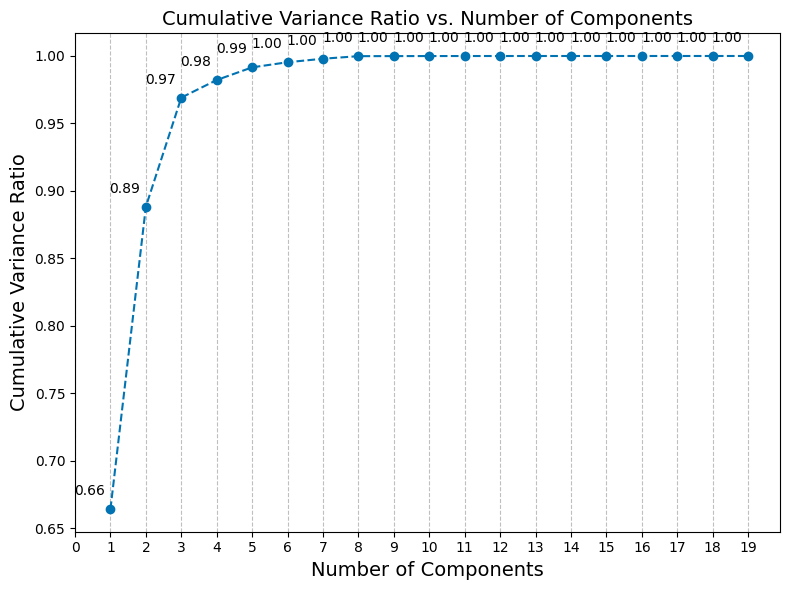

In [ ]:
# Define different numbers of components to try
n_components_list = range(1, 20, 1)
cumulative_variance_ratios = []

# Initialize a list to store transformed dataframes
transformed_dataframes = []

for n_components in n_components_list:
    # Instantiate PCA with desired number of components
    pca = PCA(n_components=n_components)
    
    # Fit PCA to the standardized data
    pca.fit(X_train)
    
    # Transform the data into the new feature space
    X_pca = pca.transform(X_train)
    
    # Save the transformed data in a dataframe
    transformed_dataframes.append(pd.DataFrame(X_pca))
    
    # Get the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = sum(explained_variance_ratio)
    cumulative_variance_ratios.append(cumulative_variance_ratio)

# Plot cumulative variance ratio
plt.figure(figsize=(8, 6))
plt.plot(n_components_list, cumulative_variance_ratios, marker='o', linestyle='--')
plt.title('Cumulative Variance Ratio vs. Number of Components', fontsize=14)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Variance Ratio', fontsize=14)

# Set x-ticks to intervals of 1
plt.xticks(np.arange(0, max(n_components_list) + 1, 1))

# Add vertical grid lines in grey
plt.grid(True, axis='x', color='grey', linestyle='--', alpha=0.5)

# Add annotations
for i, txt in enumerate(cumulative_variance_ratios):
    plt.annotate(f'{txt:.2f}', (n_components_list[i], cumulative_variance_ratios[i]), textcoords="offset points", xytext=(-15,10), ha='center')
plt.tight_layout()

# Save the plot into the figures folder with a proper filename prefix
filename = 'mit_PCA_cumulative_variance_ratio_vs_nr_components.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()

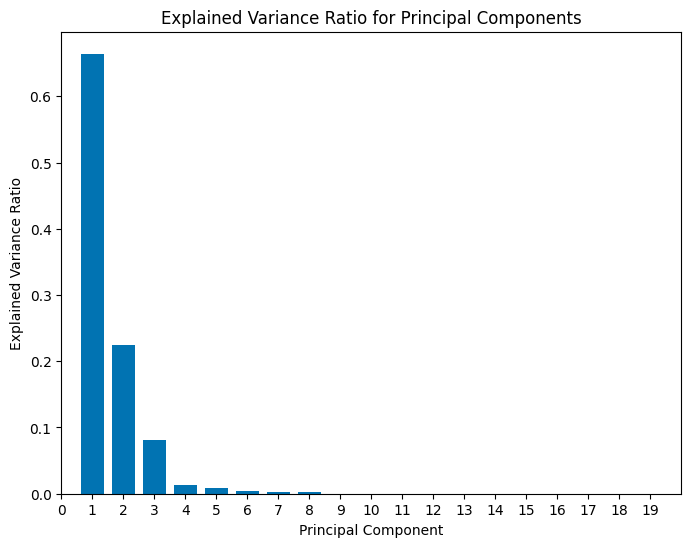

In [ ]:
# Re-run PCA with the selected number of components 
X_pca = pca.fit_transform(X_train)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, width=0.75)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components')
plt.xlim(0, len(explained_variance_ratio) + 1)

# Set x-ticks to intervals of 1
plt.xticks(np.arange(0, max(n_components_list) + 1, 1))

# Save the plot into the figures folder with a proper filename prefix
filename = 'mit_explained_variance_ratio_pca.png'
filepath = os.path.join(figures_folder, filename)
plt.savefig(filepath)

plt.show()